<a href="https://colab.research.google.com/github/TanmayeeKolli/Drug-Discovery-Model-Ovarian-Cancer/blob/main/Pt5_Drug_Discovery_for_Ovarian_Cancer_Part_5_Comparing_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computational Drug Discovery for Ovarian Cancer [Part 5] Comparing Regression Models**

*Tanmayee Kolli*


In Part 5, I compared several ML algorithms for building regression models of potential PARP inhibitors to usefor Ovarian Cancer therapies.

Reference: [*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor) by Chanin Nantasenamat



## **1. Import libraries**

We can use the lazypredict library to be able to compare multiple machine learning algorithms at a time.

In [2]:
! pip install lazypredict

The below packages help with creating data sets, statistical visualization, and creating ML models.

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## **2. Load the data set**


In [4]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Drug Discovery Ovarian Cancer project/data/PARP_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df.head(4)

Mounted at /content/gdrive/


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.00
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.49
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.77
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.00


Similar to part 4, I split the data into X and Y datasets, where X is all the fingerprints except the pIC50 column, and Y is just the pIC50 column.

In [5]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [6]:
# Examine X dimension
X.shape

(744, 881)

Removed low variance features to improve predictive power, as I've done in Part 4.

In [7]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(744, 147)

The data was once again split into 80% training and 20% testing.

In [8]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

To build multiple machine learning models, we assign machine learning algorithms to a classifier variables and then assigning data to train and test models.

In [15]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
train,test = clf.fit(X_train, X_test, Y_train, Y_test)


100%|██████████| 42/42 [00:19<00:00,  2.18it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 441
[LightGBM] [Info] Number of data points in the train set: 595, number of used features: 147
[LightGBM] [Info] Start training from score 6.565086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

From looking at the training set below, we can see that the SVR test had the best performance. We used a RandomForestRegressor in our previous part, which has a lower R^2 value of 0.49.

In [16]:
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
SVR,-59.35,0.59,0.99,0.11
NuSVR,-60.28,0.59,1.00,0.10
GradientBoostingRegressor,-64.20,0.56,1.03,0.38
PoissonRegressor,-66.43,0.54,1.05,0.10
LassoLarsCV,-68.01,0.53,1.06,0.16
LassoLarsIC,-68.01,0.53,1.06,0.05
BayesianRidge,-68.31,0.53,1.06,0.20
ElasticNetCV,-68.45,0.53,1.06,3.07
TweedieRegressor,-68.91,0.53,1.07,0.03


We get similar values for the test data below.

In [17]:
test


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
SVR,-59.35,0.59,0.99,0.11
NuSVR,-60.28,0.59,1.00,0.10
GradientBoostingRegressor,-64.20,0.56,1.03,0.38
PoissonRegressor,-66.43,0.54,1.05,0.10
LassoLarsCV,-68.01,0.53,1.06,0.16
LassoLarsIC,-68.01,0.53,1.06,0.05
BayesianRidge,-68.31,0.53,1.06,0.20
ElasticNetCV,-68.45,0.53,1.06,3.07
TweedieRegressor,-68.91,0.53,1.07,0.03


## **5. Data visualization of model performance**

The bottom code is taken from Nantasenamat, and it helps to visualize the performance of each model using R-Squared values.

<Figure size 1000x1000 with 0 Axes>

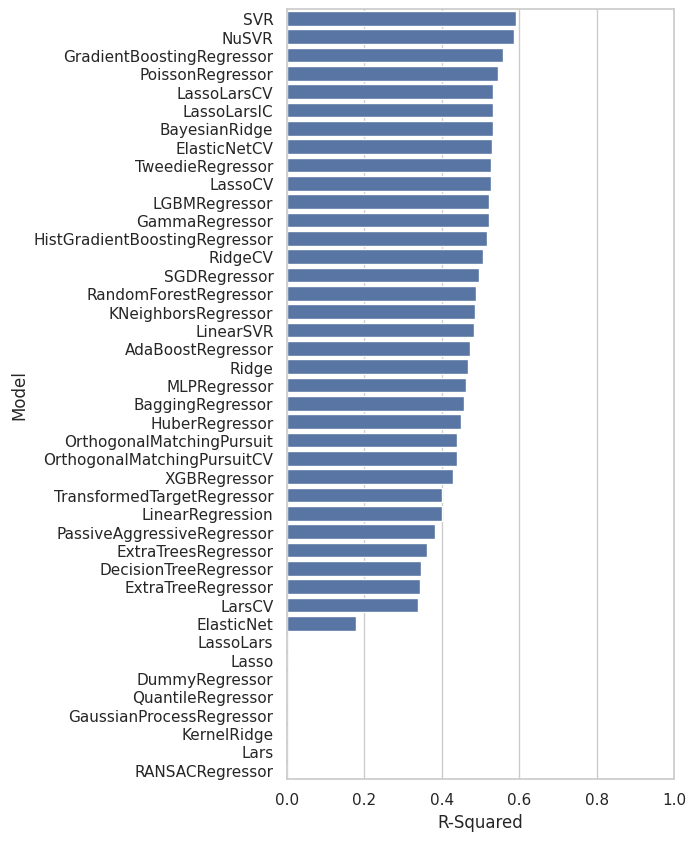

<Figure size 1000x1000 with 0 Axes>

In [19]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared", data=train)

ax.set(xlim=(0, 1))
plt.savefig('barplot train pred')
plt.figure(figsize=(10,10))


The code below from Nantasenamat measures Root-Mean-Squared values, which quantifies the distance between predicted value and actual value. A lower RMSE predicts better accuracy, which is seen in the SVR model being the most accurate.

[(0.0, 10.0)]

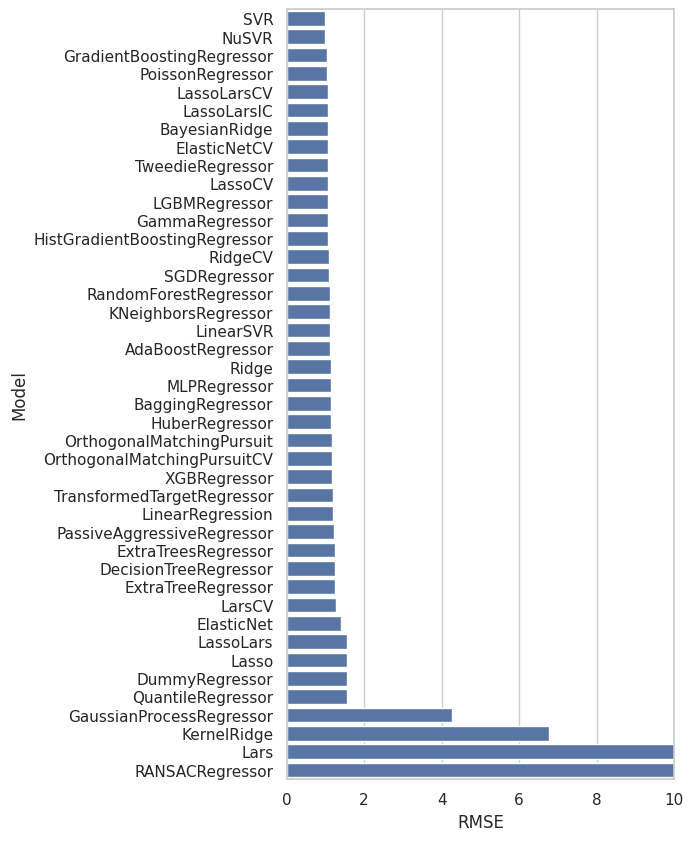

In [21]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 10))

The bottom code shows calculation time taken to generate each model.

[(0.0, 10.0)]

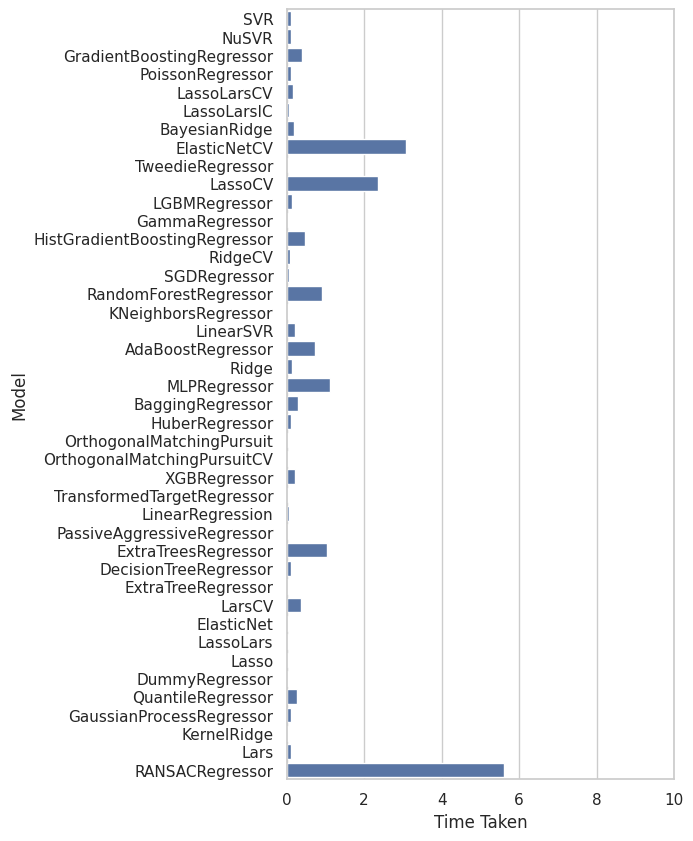

In [22]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="Time Taken", data=train)
ax.set(xlim=(0, 10))

We can conclude that **SVM, or Support Vector Machine, was the best model to choose to classify PARP inhibitors** as it had the highest R-squared values, lowest RMSE, and took a short time to generate. These models are useful for **High-Dimensional data**, which is helpful when there are hundreds or thousands of molecules, as well as **non-linear separation**, which is helpful when capturing intricate relationships between chemical structure and biological activity.